In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ara=np.array([[5,5],
              [15,5],
              [16,5]])

In [5]:
ara[ara.sum(1)%10==0]

array([[ 5,  5],
       [15,  5]])

In [6]:
l=[1,2]
y=[2,3]
l*y

TypeError: can't multiply sequence by non-int of type 'list'

In [ ]:
-0.5*np.dot(np.dot((train[i,:]-mean1).T,np.linalg.inv(sigma1)),
            (train[i,:]-mean1))-np.log(2*np.pi)-
0.5*np.log(np.linalg.det(sigma1))+np.log(prior1)

In [2]:
train = pd.read_csv('train-perceptron.txt',sep= ' ',names=["x1","x2","Y"])

In [8]:
"b"+20

TypeError: can only concatenate str (not "int") to str

In [3]:
train

,x1,x2,Y
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [4]:
class1=train[train['Y']==1].iloc[:,0:2].reset_index(drop=True) 
class2=train[train['Y']==2].iloc[:,0:2].reset_index(drop=True)

In [5]:
class1

,x1,x2
0,1,1.0
1,1,-1.0
2,4,5.0


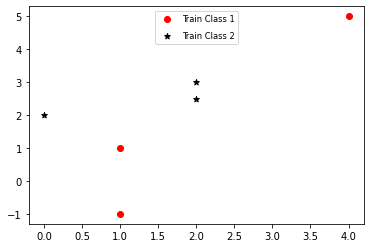

<Figure size 1080x576 with 0 Axes>

In [6]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(class1['x1'], class1['x2'],marker='o',color='r',label='Train Class 1')
ax.scatter(class2['x1'], class2['x2'],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

In [7]:
x=[]
y=[]
m=0.5
c=1
for i in range(-1,5):
    x.append(i)
    y.append(m*i+c)
    

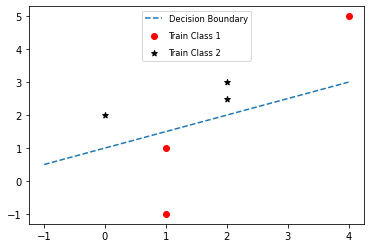

<Figure size 1080x576 with 0 Axes>

In [8]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,8))

ax.scatter(class1['x1'], class1['x2'],marker='o',color='r',label='Train Class 1')
ax.scatter(class2['x1'], class2['x2'],marker='*',color='k',label='Train Class 2')
ax.plot(x,y,"--",label="Decision Boundary")
legend = ax.legend(loc='upper center', shadow=False, fontsize='small',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()

Linear separable can not separate the two classes.. So we need to increase dimension 

In [9]:
def phi_function(x1,x2):
    return [x1**2, x2**2, x1*x2, x1, x2, 1] 

In [10]:
class1['x2'][2]

5.0

In [11]:
y1=[]
y2=[]

In [12]:
for i in range(len(class1)):    
    y1.append(phi_function(class1['x1'][i],class1['x2'][i]))
    y2.append(phi_function(class2['x1'][i],class2['x2'][i]))
    

In [13]:
y1

[[1, 1.0, 1.0, 1, 1.0, 1],
 [1, 1.0, -1.0, 1, -1.0, 1],
 [16, 25.0, 20.0, 4, 5.0, 1]]

In [14]:
y2

[[4, 6.25, 5.0, 2, 2.5, 1], [0, 4.0, 0.0, 0, 2.0, 1], [4, 9.0, 6.0, 2, 3.0, 1]]

In [15]:
normalize_two=np.array(y2).dot(-1)

In [16]:
normalize_two

array([[-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 0.  , -4.  ,  0.  ,  0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [17]:
y1=np.array(y1)

In [18]:
y1

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1., -1.,  1.],
       [16., 25., 20.,  4.,  5.,  1.]])

In [19]:
y = np.concatenate((y1,normalize_two))

In [20]:
y

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [ 0.  , -4.  ,  0.  ,  0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [21]:
def single_update(lr,w):
    
    itr=1
    
    for j in range(0,100):
        
        mc=0

        for i in range(len(y)):
            
#             print(j,np.dot(y[i],w))
            
            if np.dot(y[i],w)<=0:
                mc+=1
                w=w+np.dot(lr,y[i])  #weights update
                
        if mc==0:
            break     #break the outer loop. we found every class correctly classified
        itr+=1
        
    return itr
    
    

In [22]:
def batch_update(lr,w):
    
    itr=0
    
    for j in range(0,200):
        
        mc=0
        
        sum_y=np.zeros(6)

        for i in range(len(y)):
            
#             print(j,np.dot(y[i],w))
            
            if np.dot(y[i],w)<=0:
                mc+=1
                
                sum_y = np.add(sum_y , y[i])
                
        if mc>0:
            
            w=w+np.dot(lr,sum_y)
                
        else:
            break
            
        itr+=1    
    return itr
            


In [23]:
def table_show(learning_rate,many_at_a_time,one_at_a_time):
  dict = {'Learning rate': learning_rate, 'Many at a time': many_at_a_time, 'One at a time':one_at_a_time}
  print(pd.DataFrame(dict).to_string(index=False)) 

In [24]:
lr = np.arange(0.1,1.1,0.1)

In [25]:
lr

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [26]:
all_zeros=np.zeros(6)
all_ones=np.ones(6)
random_w=[]

In [27]:
import random
np.random.seed(6)
for i in range(6):
  random_w.append(random.randint(0, 6))

In [28]:
weights=np.vstack((all_zeros, all_ones,random_w))

In [29]:
weights

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 1., 0., 4., 4., 3.]])

 Learning rate  Many at a time  One at a time
           0.1             104             94
           0.2             104             94
           0.3              91             94
           0.4             104             94
           0.5              91             94
           0.6             104             94
           0.7             104             94
           0.8             104             94
           0.9             104             94
           1.0              91             94


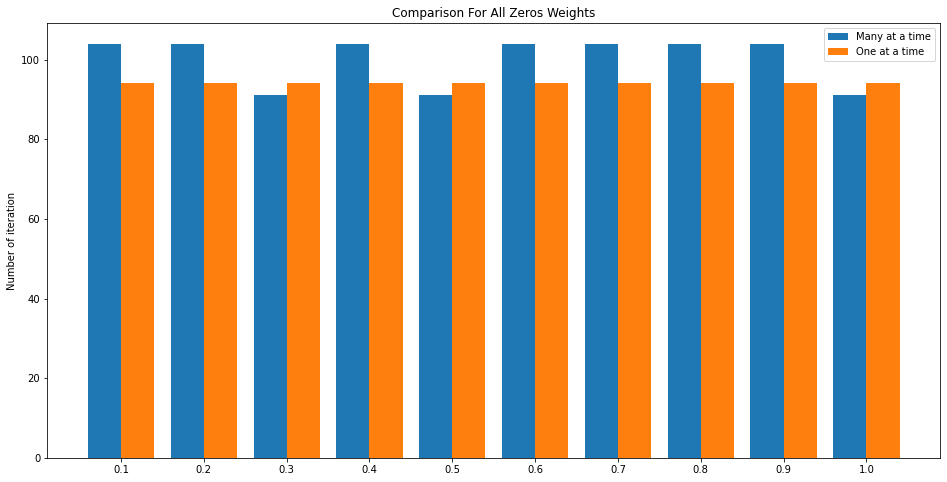

 Learning rate  Many at a time  One at a time
           0.1             101              6
           0.2             103             92
           0.3              90            101
           0.4             115            101
           0.5             104             93
           0.6             113             93
           0.7              90            101
           0.8              90            101
           0.9             104             94
           1.0              92             94


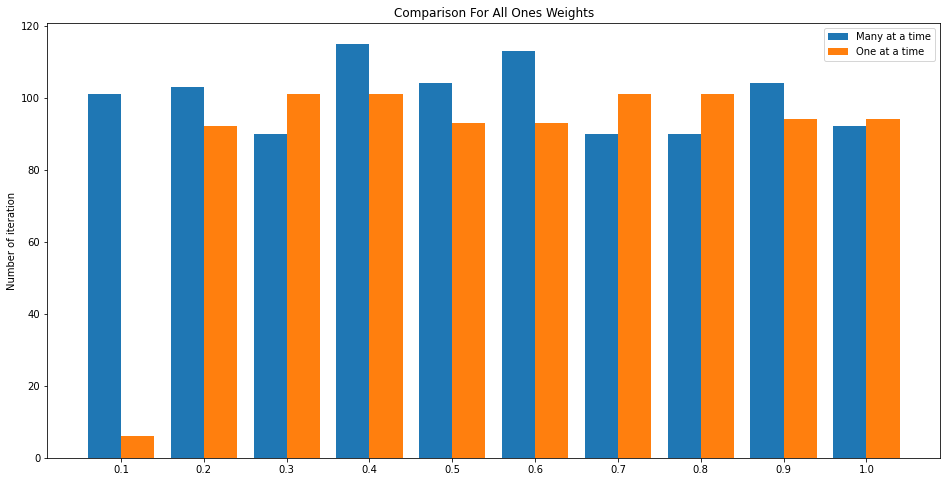

 Learning rate  Many at a time  One at a time
           0.1              78             24
           0.2              82             89
           0.3             125             11
           0.4             145            101
           0.5             118            101
           0.6             134            101
           0.7             115             94
           0.8             111            101
           0.9             116            101
           1.0              94            101


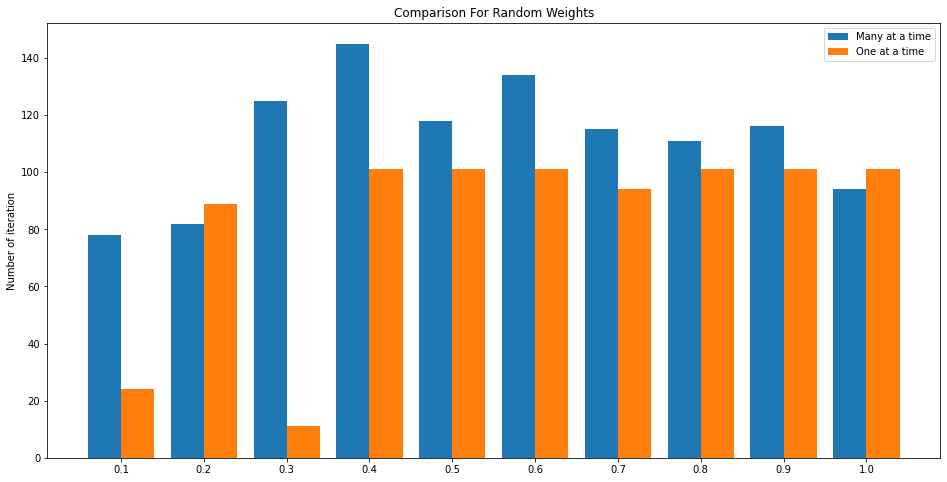

In [30]:
level=['All Zeros Weights','All Ones Weights','Random Weights']
for j in range(len(weights)):
    lst1=[]
    lst2=[]
    for i in lr:
        iter_batch=batch_update(i,weights[j])
        lst1.append(iter_batch)
        iter_single=single_update(i,weights[j])
        lst2.append(iter_single)

    table_show(lr,lst1,lst2)   
    X_axis = np.arange(len(lr))

    plt.figure(figsize=(16,8))
    plt.bar(X_axis - 0.2, lst1, 0.4, label = 'Many at a time')
    plt.bar(X_axis + 0.2, lst2, 0.4, label = 'One at a time')

    plt.xticks(X_axis, np.around(lr,1))
    # plt.xlabel("Groups")
    plt.ylabel("Number of iteration")
    plt.title("Comparison For "+str(level[j]))
    plt.legend()
    plt.show()
    

# Questions answer

1. Why do we need to take the sample points to a high dimension?

Ans: Sometimes in lower dimension linear separable cant be done. In that case we need to take the sample points to higher dimension.

2. In each of the three initial weight cases and for each learning rate, how many updates
does the algorithm take before converging?

Ans: The answer is shown in the above output cell. 